In [2]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
def load_cifar10_dataset(train_batch_size, val_batch_size):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
    trainset, valset = torch.utils.data.random_split(trainset, [len(trainset) - 5000, 5000])
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=train_batch_size,shuffle=True, num_workers=2)
    valloader = torch.utils.data.DataLoader(valset, batch_size=val_batch_size,shuffle=False, num_workers=2)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=val_batch_size,shuffle=False, num_workers=2)
    return trainloader, valloader, testloader

In [4]:
train_batch_size = 64
val_batch_size = 64
trainloader, valloader, testloader = load_cifar10_dataset(train_batch_size, val_batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 2000)
        self.bn1 = nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 1000)
        self.bn2 = nn.BatchNorm1d(1000)
        self.fc3 = nn.Linear(1000, 500)
        self.bn3 = nn.BatchNorm1d(500)
        self.fc4 = nn.Linear(500, 300)
        self.bn4 = nn.BatchNorm1d(300)
        self.fc5 = nn.Linear(300, 100)
        self.bn5 = nn.BatchNorm1d(100)
        self.fc6 = nn.Linear(100, 50)
        self.bn6 = nn.BatchNorm1d(50)
        self.fc7 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = torch.relu(x)
        x = self.fc4(x)
        x = self.bn4(x)
        x = torch.relu(x)
        x = self.fc5(x)
        x = self.bn5(x)
        x = torch.relu(x)
        x = self.fc6(x)
        x = self.bn6(x)
        x = torch.relu(x)
        x = self.fc7(x)
        return x


In [6]:
device = torch.device("cpu")
net=Net().to(device)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [8]:
def train(net, trainloader, valloader, criterion, optimizer, num_epochs):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        net.train()
        for i, data in enumerate(trainloader, 0):            
            inputs, labels = data
            inputs, labels = inputs.to(device),labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(trainloader)
        train_losses.append(train_loss)

        net.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for data in valloader:
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted.to(device) == labels.to(device)).sum().item()

        val_loss /= len(valloader)
        val_losses.append(val_loss)

        print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}, Val Accuracy: {:.2f}%'
              .format(epoch+1, num_epochs, train_loss, val_loss, 100 * correct / total))

    return train_losses, val_losses

In [9]:
num_epochs = 20
train_losses, val_losses = train(net, trainloader, valloader, criterion, optimizer, num_epochs)

KeyboardInterrupt: 

In [4]:
train_losses=[1.6628, 1.4332, 1.3143, 1.2211, 1.1370, 1.0661, 0.9987, 0.9321,0.8636,0.8204, 0.7537, 0.7091, 0.6422,0.6133, 0.5494, 0.5104, 0.4652, 0.4154, 0.4113,0.3701]
val_losses=[1.4814,1.4026, 1.3937, 1.3261, 1.3258, 1.3307,1.2939, 1.3486, 1.3115, 1.4288, 1.3849,  1.4145, 1.5058,1.4918,1.5908,1.6138,1.6448, 1.7028,1.7596, 1.7714]

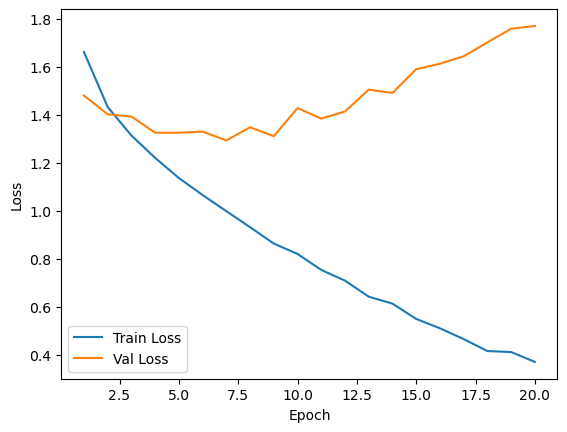

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1, 21), train_losses, label='Train Loss')
plt.plot(range(1, 21), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('plot.png')
plt.legend()
plt.show()